In [1]:
# CS 4440 - Amazon dataset embeddings
# Adapted from https://towardsdatascience.com/building-a-recommendation-system-using-neural-network-embeddings-1ef92e5c80c9

import keras
import pandas as pd
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [3]:
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [195]:
meta_df = getDF('meta_Prime_Pantry.json.gz')
rows,columns=meta_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)
meta_df.head()

Number of rows:  10815
Number of columns:  11


,description,title,also_buy,image,brand,details,price,asin,also_view,rank,feature
0,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,Milk Duds,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",$5.00,B00005BPJO,NaN,NaN,NaN
1,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,Milk Duds,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",$5.00,B00005BPJO,NaN,NaN,NaN
2,[A perfect Lentil soup starts with Goya Lentil...,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",[https://images-na.ssl-images-amazon.com/image...,Goya,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,B0000DIF38,"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",NaN,NaN
3,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",[https://images-na.ssl-images-amazon.com/image...,Saran,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,B0000DIWNI,"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaN,NaN
4,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",NaN,[https://images-na.ssl-images-amazon.com/image...,Saran,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,B0000DIWNZ,[B0014CZ0TE],NaN,NaN


In [196]:
#Number of unique user id  in the data
print('Number of unique product in Raw data = ', meta_df['asin'].nunique())

Number of unique product in Raw data =  10814


In [197]:
df = meta_df[['asin', 'also_buy', 'also_view', 'title']]

In [198]:
df.head()

,asin,also_buy,also_view,title
0,B00005BPJO,"[B019KE37WO, B007NQSWEU]",NaN,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C..."
1,B00005BPJO,"[B019KE37WO, B007NQSWEU]",NaN,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C..."
2,B0000DIF38,"[B003SI144W, B000VDRKEK]","[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...","Goya Dry Lentils, 16 oz"
3,B0000DIWNI,"[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...","[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...","Saran Premium Plastic Wrap, 100 Sq Ft"
4,B0000DIWNZ,NaN,[B0014CZ0TE],"Saran Cling Plus Plastic Wrap, 200 Sq Ft"


In [199]:
# Remove asin if also_buy and also_view are both NaN
df = df.dropna(subset=['also_buy', 'also_view'], how='all')

#Remove duplicates asin
df.drop_duplicates(subset ="asin", keep = 'first', inplace = True) 

In [200]:
df.shape

(7784, 4)

In [201]:
df.loc[df['also_buy'].isnull(),['also_buy']] = df.loc[df['also_buy'].isnull(),'also_buy'].apply(lambda x: [])
df.loc[df['also_view'].isnull(),['also_view']] = df.loc[df['also_view'].isnull(),'also_view'].apply(lambda x: [])
df['buy_and_view'] = df['also_buy'] + df['also_view']

In [202]:
df.shape
df.head()

,asin,also_buy,also_view,title,buy_and_view
0,B00005BPJO,"[B019KE37WO, B007NQSWEU]",[],"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]"
2,B0000DIF38,"[B003SI144W, B000VDRKEK]","[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...","Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK, B074MFVZG7, B079PTH69..."
3,B0000DIWNI,"[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...","[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...","Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8..."
4,B0000DIWNZ,[],[B0014CZ0TE],"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[B0014CZ0TE]
5,B0000GH6UG,[B008MHKWLK],[],"Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK]


In [203]:
# Mapping of asin to index and index to asin
asin_index = {}
index_asin = {}

for i, a in enumerate(df['asin']):
    asin_index[a] = i
    index_asin[i] = a

link_index = {}
index_link = {}
index = 0 
# add the asin for buy_and_view
for link_arr in df['buy_and_view']:
    for link in link_arr:
        if link not in link_index:
            link_index[link] = index
            index_link[index] = link
            index += 1

In [204]:
pairs = []
asin_name = {}
for index, row in df.iterrows():
    asinp = row['asin']
    namep = row['title']
    asin_name[asinp] = namep
    for link in row['buy_and_view']:
        pairs.append((asin_index[row['asin']], link_index[link]))

In [161]:
import numpy as np
import random
random.seed(100)

def generate_batch(pairs, n_positive = 50, negative_ratio = 1.0, classification = False):
    """Generate batches of samples for training"""
    batch_size = n_positive * (1 + negative_ratio)
    batch = np.zeros((batch_size, 3))
    pairs_set = set(pairs)
    
    # Adjust label based on task
    if classification:
        neg_label = 0
    else:
        neg_label = -1
    
    # This creates a generator
    while True:
        # randomly choose positive examples
        for idx, (asin_id, link_id) in enumerate(random.sample(pairs, n_positive)):
            batch[idx, :] = (asin_id, link_id, 1)

        # Increment idx by 1
        idx += 1
        
        # Add negative examples until reach batch size
        while idx < batch_size:
            
            # random selection
            random_asin = random.randrange(len(asin_index))
            random_link = random.randrange(len(link_index))
            
            # Check to make sure this is not a positive example
            if (random_asin, random_link) not in pairs_set:
                
                # Add to batch and increment index
                batch[idx, :] = (random_asin, random_link, neg_label)
                idx += 1
                
        # Make sure to shuffle order
        np.random.shuffle(batch)
        yield {'asin': batch[:, 0], 'link': batch[:, 1]}, batch[:, 2]

In [162]:
next(generate_batch(pairs, n_positive = 2, negative_ratio = 2))

({'asin': array([2224., 3219., 2865., 1431., 3726., 6274.]),
  'link': array([ 3671., 11992.,  7102., 11559., 12628.,  8076.])},
 array([ 1., -1., -1., -1., -1.,  1.]))

In [166]:
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model
def embedding_model(embedding_size = 50, classification = False):
    """Model to embed item and link using the Keras functional API.
       Trained to discern if another product is in the corresponding list"""
    
    # Both inputs are 1-dimensional
    asin = Input(name = 'asin', shape = [1])
    link = Input(name = 'link', shape = [1])
    
    # Embedding the asin (shape will be (None, 1, 50))
    asin_embedding = Embedding(name = 'asin_embedding',
                               input_dim = len(asin_index),
                               output_dim = embedding_size)(asin)
    
    # Embedding the link (shape will be (None, 1, 50))
    link_embedding = Embedding(name = 'link_embedding',
                               input_dim = len(link_index),
                               output_dim = embedding_size)(link)
    
    # Merge the layers with a dot product along the second axis 
    # (shape will be (None, 1, 1))
    merged = Dot(name = 'dot_product', normalize = True, 
                 axes = 2)([asin_embedding, link_embedding])
    
    # Reshape to be a single number (shape will be (None, 1))
    merged = Reshape(target_shape = [1])(merged)
    
    # Squash outputs for classification
    out = Dense(1, activation = 'sigmoid')(merged)
    model = Model(inputs = [asin, link], outputs = out)
    
    # Compile using specified optimizer and loss 
    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

In [167]:
model = embedding_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
asin (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
link (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
asin_embedding (Embedding)      (None, 1, 50)        389200      asin[0][0]                       
__________________________________________________________________________________________________
link_embedding (Embedding)      (None, 1, 50)        760600      link[0][0]                       
____________________________________________________________________________________________

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

def find_similar(name, weights, index_name = 'asin', n = 10, least = False, return_dist = False, plot = False):
    """Find n most similar items (or least) to name based on embeddings. Option to also plot the results"""
    
    # Select index and reverse index
    if index_name == 'asin':
        index = asin_index
        rindex = index_asin
    elif index_name == 'link':
        index = link_index
        rindex = index_link
    
    # Check to make sure `name` is in index
    try:
        # Calculate dot product between book and all others
        dists = np.dot(weights, weights[index[name]])
    except KeyError:
        print(f'{name} Not Found.')
        return
    
    # Sort distance indexes from smallest to largest
    sorted_dists = np.argsort(dists)
    
    # Plot results if specified
    if plot:
        
        # Find furthest and closest items
        furthest = sorted_dists[:(n // 2)]
        closest = sorted_dists[-n-1: len(dists) - 1]
        items = [rindex[c] for c in furthest]
        items.extend(rindex[c] for c in closest)
        
        # Find furthest and closets distances
        distances = [dists[c] for c in furthest]
        distances.extend(dists[c] for c in closest)
        
        colors = ['r' for _ in range(n //2)]
        colors.extend('g' for _ in range(n))
        
        data = pd.DataFrame({'distance': distances}, index = items)
        
        # Horizontal bar chart
        data['distance'].plot.barh(color = colors, figsize = (10, 8),
                                   edgecolor = 'k', linewidth = 2)
        plt.xlabel('Cosine Similarity');
        plt.axvline(x = 0, color = 'k');
        
        # Formatting for italicized title
        name_str = f'Products Most and Least Similar to'
        for word in name.split():
            # Title uses latex for italize
            name_str += ' $\it{' + word + '}$'
        plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
        return None
    
    # If specified, find the least similar
    if least:
        # Take the first n from sorted distances
        closest = sorted_dists[:n]
         
        print(f'{index_name}s furthest from {asin_name[name]} ({name}).\n')
        
    # Otherwise find the most similar
    else:
        # Take the last n sorted distances
        closest = sorted_dists[-n:]
        
        # Need distances later on
        if return_dist:
            return dists, closest
        
        
        print(f'{index_name.capitalize()}s closest to {asin_name[name]} ({name}).\n')
        
    # Need distances later on
    if return_dist:
        return dists, closest
    
    
    # Print formatting
    max_width = max([len(rindex[c]) for c in closest])
    
    # Print the most similar and distances
    for c in reversed(closest):
        print(f'''{asin_name[rindex[c]]:{max_width + 2}} 
        {index_name.capitalize()}: {rindex[c]:{max_width + 2}} Similarity: {dists[c]:.{2}}''')

In [308]:
n_positive = 2**14
epochs = 15
negative_ratio = 2

gen = generate_batch(pairs, n_positive, negative_ratio = negative_ratio, classification=True)

steps_per_epoch = len(pairs) // n_positive


# Train
h = model.fit_generator(gen, epochs = epochs, 
                        steps_per_epoch = steps_per_epoch)

Epoch 1/15
18/18 [==============================] - 5s 258ms/step - loss: 1.1290 - accuracy: 0.8733
Epoch 2/15
18/18 [==============================] - 5s 253ms/step - loss: 0.8624 - accuracy: 0.89113s -
Epoch 3/15
18/18 [==============================] - 4s 249ms/step - loss: 0.6715 - accuracy: 0.9055
Epoch 4/15
18/18 [==============================] - 4s 248ms/step - loss: 0.8943 - accuracy: 0.8879
Epoch 5/15
18/18 [==============================] - 5s 261ms/step - loss: 0.6924 - accuracy: 0.9024
Epoch 6/15
18/18 [==============================] - 4s 246ms/step - loss: 0.8181 - accuracy: 0.8942
Epoch 7/15
18/18 [==============================] - 5s 277ms/step - loss: 0.7962 - accuracy: 0.8957
Epoch 8/15
18/18 [==============================] - 5s 298ms/step - loss: 0.8569 - accuracy: 0.8899
Epoch 9/15
18/18 [==============================] - 5s 271ms/step - loss: 0.9154 - accuracy: 0.8832
Epoch 10/15
18/18 [==============================] - 5s 282ms/step - loss: 0.6789 - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.111292). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


18/18 [==============================] - 5s 280ms/step - loss: 0.7029 - accuracy: 0.9034
Epoch 12/15
18/18 [==============================] - 5s 253ms/step - loss: 0.7762 - accuracy: 0.8968
Epoch 13/15
18/18 [==============================] - 5s 261ms/step - loss: 0.6324 - accuracy: 0.9047
Epoch 14/15
18/18 [==============================] - 5s 255ms/step - loss: 0.8700 - accuracy: 0.8871
Epoch 15/15
18/18 [==============================] - 5s 256ms/step - loss: 0.8742 - accuracy: 0.8890


In [309]:
model.save(f'models/model-n_positive-{n_positive}-epochs-{epochs}-negative_ratio-{negative_ratio}.h5')

In [310]:
asin_layer = model.get_layer('asin_embedding')
asin_weights = asin_layer.get_weights()[0]
asin_weights.shape

(7784, 50)

In [311]:
asin_weights = asin_weights / np.linalg.norm(asin_weights, axis = 1).reshape((-1, 1))
asin_weights[0][:10]
np.sum(np.square(asin_weights[0]))

0.99999994

In [313]:
find_similar('B0000GH6UG', asin_weights)
find_similar('B0000DIWNI', asin_weights)
find_similar('B00005BPJO', asin_weights)

prod_arr = ['B00005BPJO','B0000DIF38','B0000DIWNI','B0000DIWNZ','B0000GH6UG','B00032E8XK','B0005XMTHE','B0005XNE6E','B0005YM4IC','B0005YMCN4','B0005ZYFM4','B0005ZHPQ2','B00061EPCM','B0007CXWCO','B00099XLXU','B00099XO5U','B00099XNXS','B00099XPNQ','B00099XPP4','B00099XPMC','B00099XP4A','B00099XO50','B00099XPD6','B00099XO3W','B00099XPMM','B0009EXQLM','B000GCHLWC','B000GGJDNI','B000HDCNAU','B000I617RG']
for i in prod_arr:
    print(f"\n\nRESULTS for {i}:")
    find_similar(i, asin_weights, least=True)


Asins closest to Ibarra Mexican Chocolate, 19 oz (B0000GH6UG).

Ibarra Mexican Chocolate, 19 oz 
        Asin: B0000GH6UG   Similarity: 1.0
Ocean Spray Pact Cranberry Extract Water, Pomegranate, 16 oz 
        Asin: B017INPTKM   Similarity: 0.99
Nicorette Nicotine Stop Smoking Gum, 2mg, Cinnamon Surge, 160 Count 
        Asin: B012H5QP22   Similarity: 0.99
Dr. Scholl's for Her Rub Relief Strips 
        Asin: B012X35Y1Q   Similarity: 0.99
Pacific Chai Tea Coconut Latte Mix, 10 Ounce 
        Asin: B01CEBQGG4   Similarity: 0.99
Ella's Kitchen Organic Coconut + Milk Nutritional Shake, Banana Apricot + Raisin, 8 Fluid Ounce (Pack of 4) 
        Asin: B00VSK53B2   Similarity: 0.99
Listerine Healthy White Vibrant Multi-Action Fluoride Mouth Rinse, Foaming Anticavity Mouthwash For Whitening Teeth and Fighting Bad Breath, 16 fl. oz 
        Asin: B012O556MU   Similarity: 0.99
SoftSheen-Carson Dark and Lovely Au Naturale Anti-Shrinkage Easy Twist Gel N' Butter, 5 fl oz 
        Asin: B01487L4U

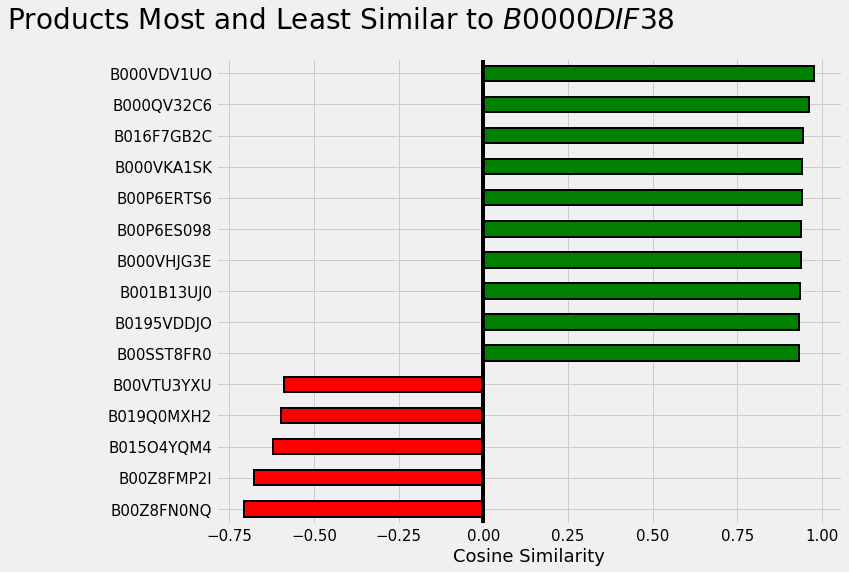

In [320]:
find_similar("B0000DIF38", asin_weights, plot=True)